In [16]:
import seaborn as sns
from tqdm import tqdm
from data.read_data import *

In [19]:
students = get_Students()
square_df = get_square_df()
rhombus_df = get_rhombus_df()
circle_df = get_circle_df()

In [10]:
# Function to sort the given array using the patience sorting
def patienceSorting(df):
    sorted_df = df.sort_values(by=df.columns[0])

    piles = []

    for i in tqdm(range(sorted_df.shape[0])):
        if not piles:
            temp = [sorted_df.iloc[i]] 
            piles.append(temp)
        else:
            flag = True

            # Traverse all the piles
            for j in range(len(piles)):
                # Check if the element to be inserted is less than
                # current pile's top
                if sorted_df.iloc[i,1] < piles[j][-1][1]:
                    piles[j].append(sorted_df.iloc[i])

                    # Update flag
                    flag = False
                    break

            # If flag is True
            if flag:
                # Create a new pile
                temp = []

                # Insert current element into temp
                temp.append(sorted_df.iloc[i])

                # Insert current pile into all the piles
                piles.append(temp)


    return piles

In [11]:
def plot_scatter_piles(piles):
    # Create an empty DataFrame to store all points
    df_all = pd.DataFrame(columns=['SAT', 'Bagrut', 'Pile'])

    # Iterate over each pile and add points to the DataFrame
    for i, pile in enumerate(piles):
        pile_df = pd.DataFrame(pile, columns=['SAT', 'Bagrut'])
        pile_df['Pile'] = f'Pile {i+1}'
        df_all = pd.concat([df_all, pile_df], ignore_index=True)

    # Create scatter plot using Seaborn
    sns.scatterplot(data=df_all, x='SAT', y='Bagrut', hue='Pile', palette='deep', markers=True, s=7)
    plt.xlabel('SAT')
    plt.ylabel('Bagrut')
    plt.title('Scatter Plot of Piles')
    plt.legend(title='Pile')
    plt.show()

# # Example usage:
# # Assuming 'df' is your DataFrame
# piles = patienceSorting(df)
# plot_scatter_piles(piles)


In [12]:
def plot_piles(piles, filename, title):
    lists_lengths = [len(sublist) for sublist in piles]
    list_indices = range(len(piles))
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create a bar plot
    ax.bar(list_indices, lists_lengths, color='skyblue', edgecolor='lightblue', label='List Lengths')
    
    # Create a line plot
    ax.plot(list_indices, lists_lengths, color='blue', linestyle='-', label='Line Connects')
    
    # Set x-axis ticks to match list indices
    ax.set_xticks(list_indices)
    
    # Set labels and title
    ax.set_xticks(range(0, len(piles), 100))
    ax.set_xlabel('Pile Number')
    ax.set_ylabel('Length of Piles')
    ax.set_title('Patient Sort Algorithm - ' + title )
    ax.grid(False)
    plt.savefig("plots/png/PS_"+ filename +".png") # save as png
    plt.savefig("plots/pdf/PS_"+ filename +".pdf") # save as pdf
    
    plt.show()

In [14]:
def plot_points_by_piles(piles, filename, title):
    palette = sns.color_palette("husl", len(piles) // 50 +1)
    plt.figure(figsize=(7, 7))
    # plt.xlim(200, 800)
    # plt.ylim(0, 120)
    
    # Iterate through the pile of real students and select points from every 50th pile
    
    for i, pile in enumerate(piles[::50]):
        # Get the color for the current pile from the palette
        color = palette[i]
        
        # Iterate through the dataframes in the current pile and plot their points
        for df in pile:
            # Plot the points from the current dataframe
            plt.scatter(df[0], df[1], color=color, s=1)
            
    
    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points from Piles of '+title+' (Every 50th Pile - Patient Sort)')
    
    plt.savefig("plots/png/PS_"+filename+"_piles_distribution.png") # save as png
    plt.savefig("plots/pdf/PS_"+filename+"_piles_distribution.pdf") # save as pdf
    
    # Show plot
    plt.show()

In [ ]:
piles = patienceSorting(students)

In [ ]:
plot_piles(piles, "real_students", "Real Students")
plot_points_by_piles(piles, "real_students", "Real Students")

In [13]:
square_piles = patienceSorting(square_df)

  0%|          | 0/136939 [00:00<?, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_3472\3180357726.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sorted_df.iloc[i,1] < piles[j][-1][1]:
100%|██████████| 136939/136939 [40:12<00:00, 56.76it/s]  


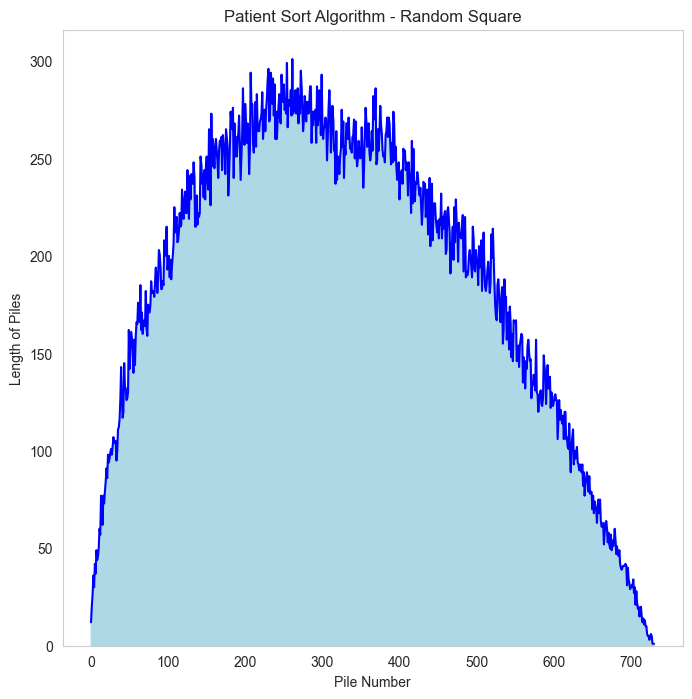

C:\Users\rotem\AppData\Local\Temp\ipykernel_3472\1124250519.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df[0], df[1], color=color, s=1)


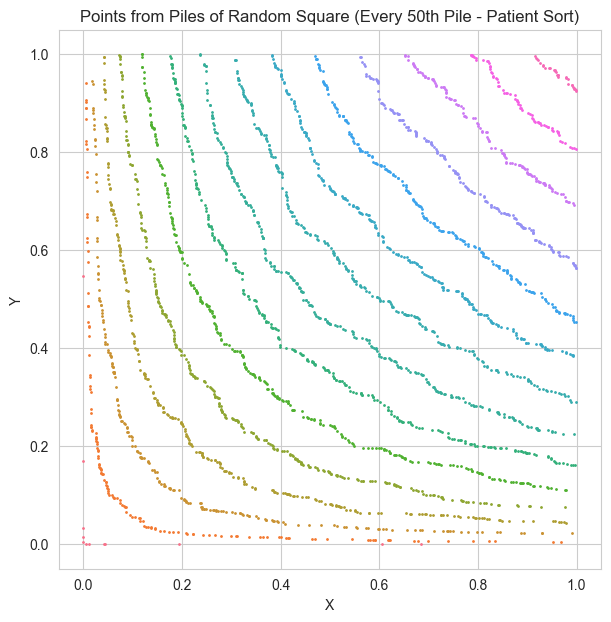

In [15]:
plot_piles(square_piles, "random_square", "Random Square")
plot_points_by_piles(square_piles, "random_square", "Random Square")

In [17]:
rhombus_piles = patienceSorting(rhombus_df)

  0%|          | 0/136939 [00:00<?, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_3472\3180357726.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sorted_df.iloc[i,1] < piles[j][-1][1]:
100%|██████████| 136939/136939 [20:04<00:00, 113.71it/s] 


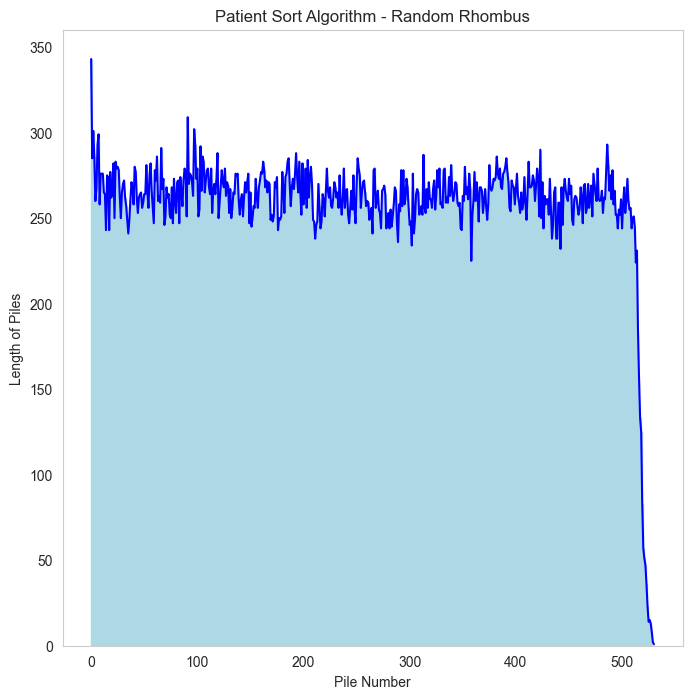

C:\Users\rotem\AppData\Local\Temp\ipykernel_3472\1124250519.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df[0], df[1], color=color, s=1)


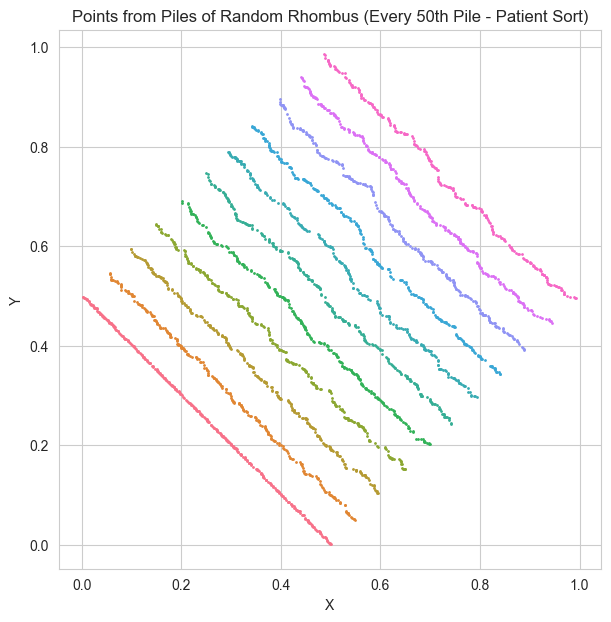

In [22]:
plot_piles(rhombus_piles, "random_rhombus", "Random Rhombus")
plot_points_by_piles(rhombus_piles, "random_rhombus", "Random Rhombus")

In [20]:
circle_piles = patienceSorting(circle_df)

  0%|          | 0/136939 [00:00<?, ?it/s]C:\Users\rotem\AppData\Local\Temp\ipykernel_3472\3180357726.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sorted_df.iloc[i,1] < piles[j][-1][1]:
100%|██████████| 136939/136939 [24:37<00:00, 92.71it/s]  


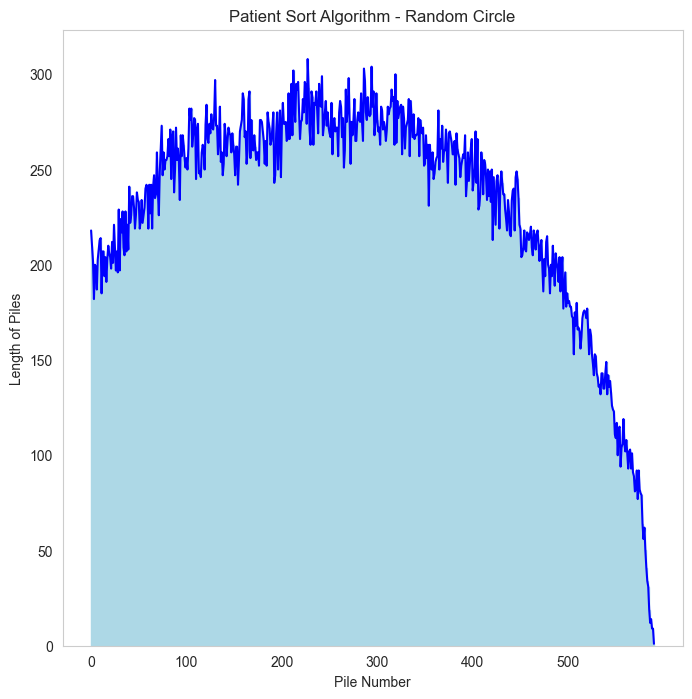

C:\Users\rotem\AppData\Local\Temp\ipykernel_3472\1124250519.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(df[0], df[1], color=color, s=1)


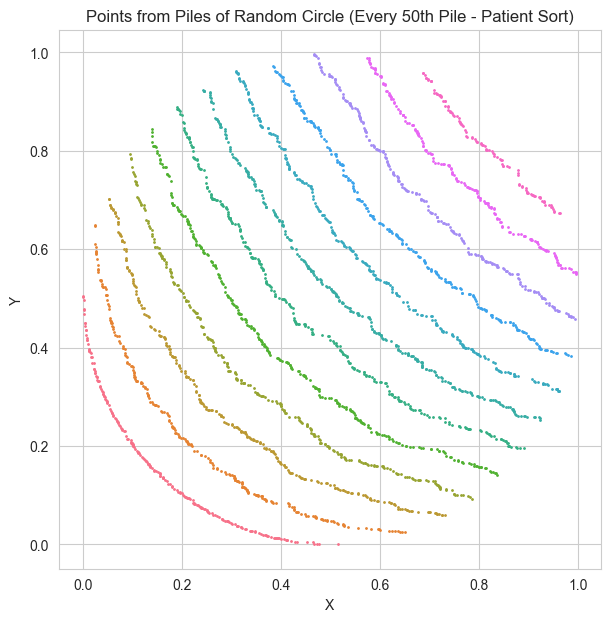

In [23]:
plot_piles(circle_piles, "random_circle", "Random Circle")
plot_points_by_piles(circle_piles, "random_circle", "Random Circle")